<a href="https://colab.research.google.com/github/Adhiksha007/AI-Bootcamp/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mattiuzc/stock-exchange-data")

print("Path to dataset files:", path)

100%|██████████| 4.56M/4.56M [00:00<00:00, 158MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mattiuzc/stock-exchange-data/versions/2


In [11]:
data = pd.read_csv(path + '/indexData.csv')

In [12]:
data

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


In [32]:
# Step 1: Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Step 2: Convert each datetime to an ordinal
data['Date'] = data['Date'].map(pd.Timestamp.toordinal)

# data.info()

In [33]:
data.isnull().sum()

,0
Index,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [34]:
data.dropna(inplace=True)

In [35]:
data.isnull().sum()

,0
Index,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [36]:
data

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,11,717701,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,11,717704,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,11,717705,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,11,717706,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,11,717707,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,8,737937,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,8,737938,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,8,737941,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,8,737942,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


In [37]:
le = LabelEncoder()
data['Index'] = le.fit_transform(data['Index'])

In [38]:
X = data.drop('Close', axis=1)
y = data['Close']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = model.predict(X_test)

In [53]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.2775590259852145


In [54]:
r2_score(y_test, y_pred)

0.9999999844556425

Text(0, 0.5, 'Close Price')

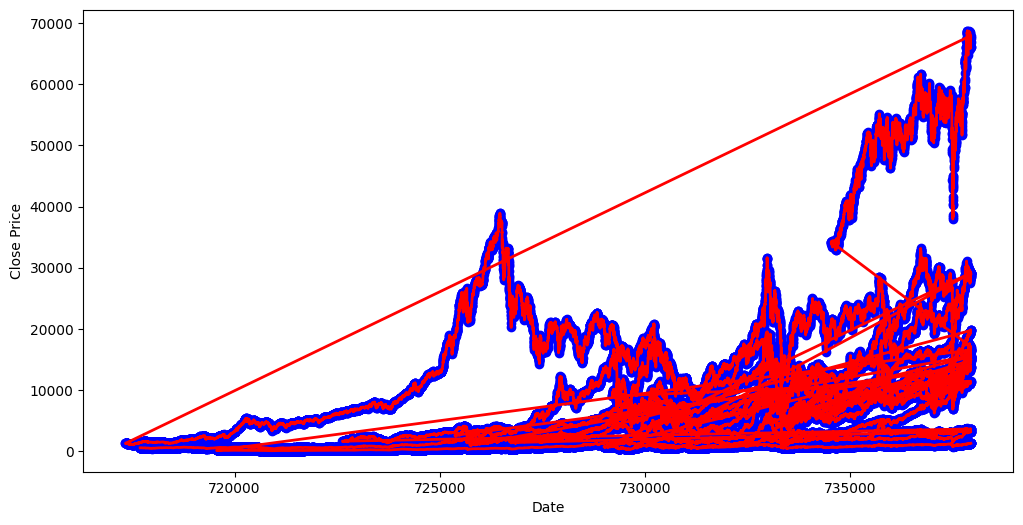

In [61]:
plt.figure(figsize=(12, 6))
plt.scatter(X['Date'], y, color='blue', label='Actual data')
plt.plot(X['Date'], model.predict(X), color='red', linewidth=2, label='Regression line')
plt.xlabel('Date')
plt.ylabel('Close Price')

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110253 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      110253 non-null  int64  
 1   Date       110253 non-null  int64  
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 7.6 MB


In [66]:
# Example with dummy/fake values – replace with real estimates
future_data = pd.DataFrame({
    'Index': [1],
    'Date': [pd.Timestamp('2025-05-19').toordinal()],
    'Open': [1450.0],
    'High': [1475.0],
    'Low': [1440.0],
    'Adj Close': [1460.0],
    'Volume': [10000000],
})

prediction = model.predict(future_data)
print("Prediction:", prediction[0])


Prediction: 1460.1300246375502
